# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

This notebook shows only protein embeddings performance along with gene expreession, as they are super competitive

## Viz

In [61]:
version='v2.11'
norm='minmax'

In [62]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [63]:
avg_df=pd.read_csv('../../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../../results/score_tables/scores_all_seeds.csv')

In [64]:
input_data=[
 'gene_expression',

#  'Complex_protein_embeddings',
#  'RGCN_protein_embeddings',
#  'weighted_RGCN_protein_embeddings',
#  'GraphSAGE_protein_embeddings',
#  'GAT_protein_embeddings',
#  'concatenated_protein_embeddings',

 'Complex_sample_embeddings',
 'RGCN_sample_embeddings',
 'weighted_RGCN_sample_embeddings',
 'GraphSAGE_sample_embeddings',
 'GAT_sample_embeddings'
 'concatenated_sample_embeddings'
]

In [65]:
df=avg_df
filtered_results=df[
        (df['input']=='gene_expression') 
        | ((df['version']==version) & (df['normalization']==norm))
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings',
                
            ])
            & (df['version']==version)
        )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [66]:
filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]

### 4. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [ ]:
metric='balanced_accuracy'

In [ ]:


SECONDARY_COLORS = {
    1: "#C60B46",  # pms-1945
    2: "#ED145B",  # pms-206
    3: "#EE3524",  # pms-1795
    4: "#F37320",  # pms-1665
    5: "#7C2A90",  # pms-2602
    6: "#7D6AAF",  # pms-2725
    7: "#C6671D", # pms-153
    8: "#FEBC18", # pms-123
    9: "#004E7D",  # pms-295
    10: "#0E87C9", # pms-2935
    11: "#0094B5", # pms-314
    12: "#46C3D2", # pms-3115
    13: "#00807A",  # pms-3292
    14: "#40B769", # pms-355
    15: "#8CC63E", # pms-376
    16: "#D5DF3D" # pms-381
}
vibrant_colors = [
    SECONDARY_COLORS[2],
    SECONDARY_COLORS[4],
    SECONDARY_COLORS[6],
    SECONDARY_COLORS[8],
    SECONDARY_COLORS[11],
    SECONDARY_COLORS[14]
]
dataset_colors={
    'gene_expression': SECONDARY_COLORS[2],# -- redish
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
}

In [ ]:
# -- replace _protein_embeddings with '' in results_df['input'] and dataset_colors keys
dataset_colors={k.replace('_sample_embeddings', ''): v for k, v in dataset_colors.items()}

filtered_results['input'] = filtered_results['input'].str.replace('_sample_embeddings', '')

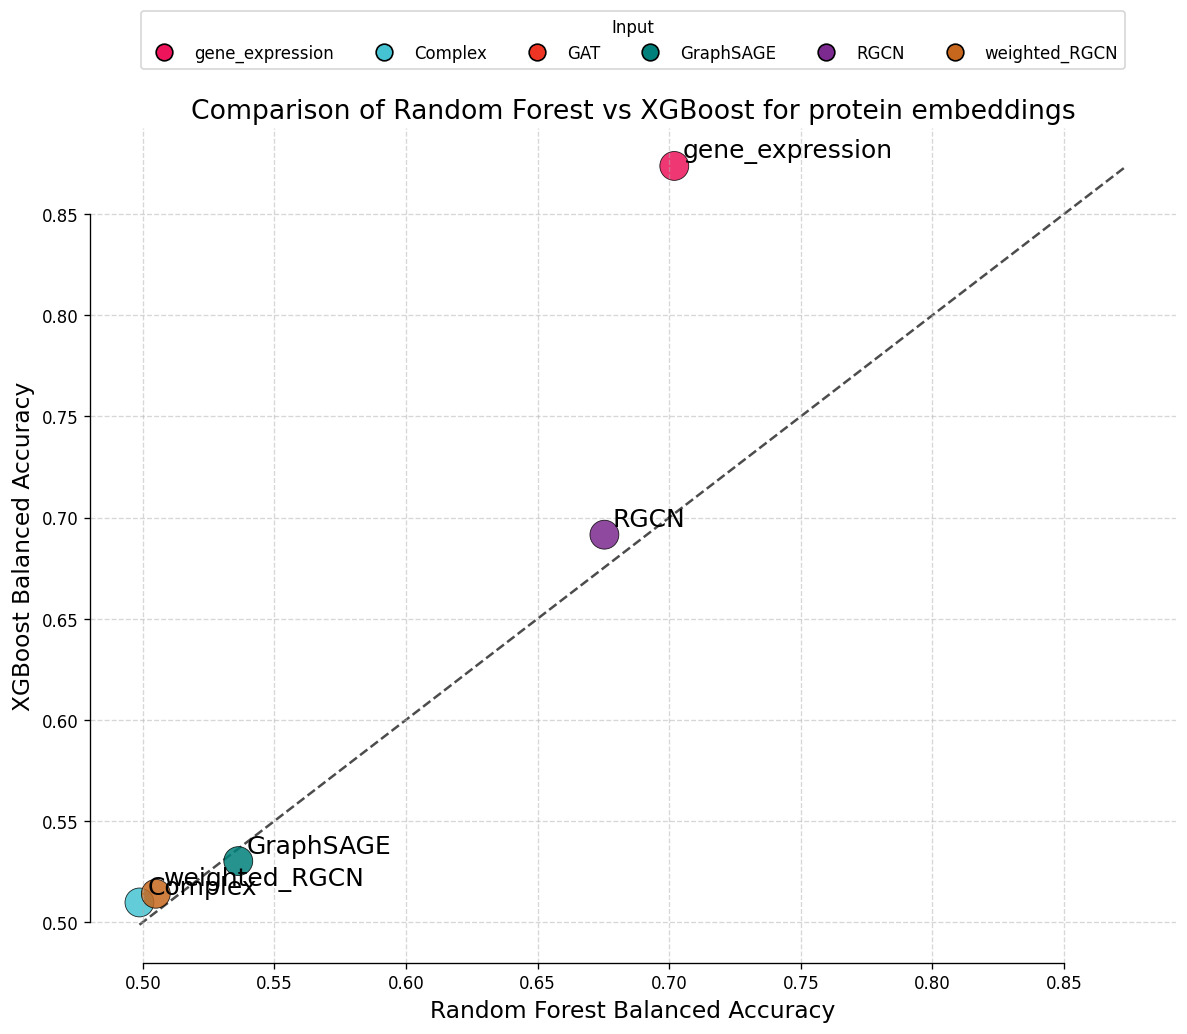

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Subset models
rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', 'balanced_accuracy']]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', 'balanced_accuracy']]

# Merge on input
merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

# Assign colors from dataset_colors
colors = [dataset_colors.get(inp, "#808080") for inp in merged['input']]  # default gray if missing

plt.figure(figsize=(10, 8), dpi=120)

# Scatter plot
plt.scatter(
    merged['balanced_accuracy_rf'],
    merged['balanced_accuracy_xgb'],
    s=300,
    c=colors,
    edgecolor='k',
    alpha=0.85,
    marker='o',
    linewidth=0.5
)

# # Diagonal y=x line for reference
lims = [
    np.min([merged['balanced_accuracy_rf'].min(), merged['balanced_accuracy_xgb'].min()]),
    np.max([merged['balanced_accuracy_rf'].max(), merged['balanced_accuracy_xgb'].max()])
]
plt.plot(lims, lims, 'k--', alpha=0.7, zorder=0)

# Annotate points
for _, row in merged.iterrows():
    plt.annotate(
        row['input'],
        (row['balanced_accuracy_rf'], row['balanced_accuracy_xgb']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=15
    )

# Labels and title
plt.xlabel('Random Forest Balanced Accuracy', fontsize=14)
plt.ylabel('XGBoost Balanced Accuracy', fontsize=14)
plt.title('Comparison of Random Forest vs XGBoost for protein embeddings', fontsize=16)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine(trim=True)
plt.tight_layout()

# Legend for categories using dataset_colors
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=color, markersize=10,
                      markeredgecolor='k', label=dataset)
           for dataset, color in dataset_colors.items()]
plt.legend(handles=handles, title='Input', loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=6)

plt.show()


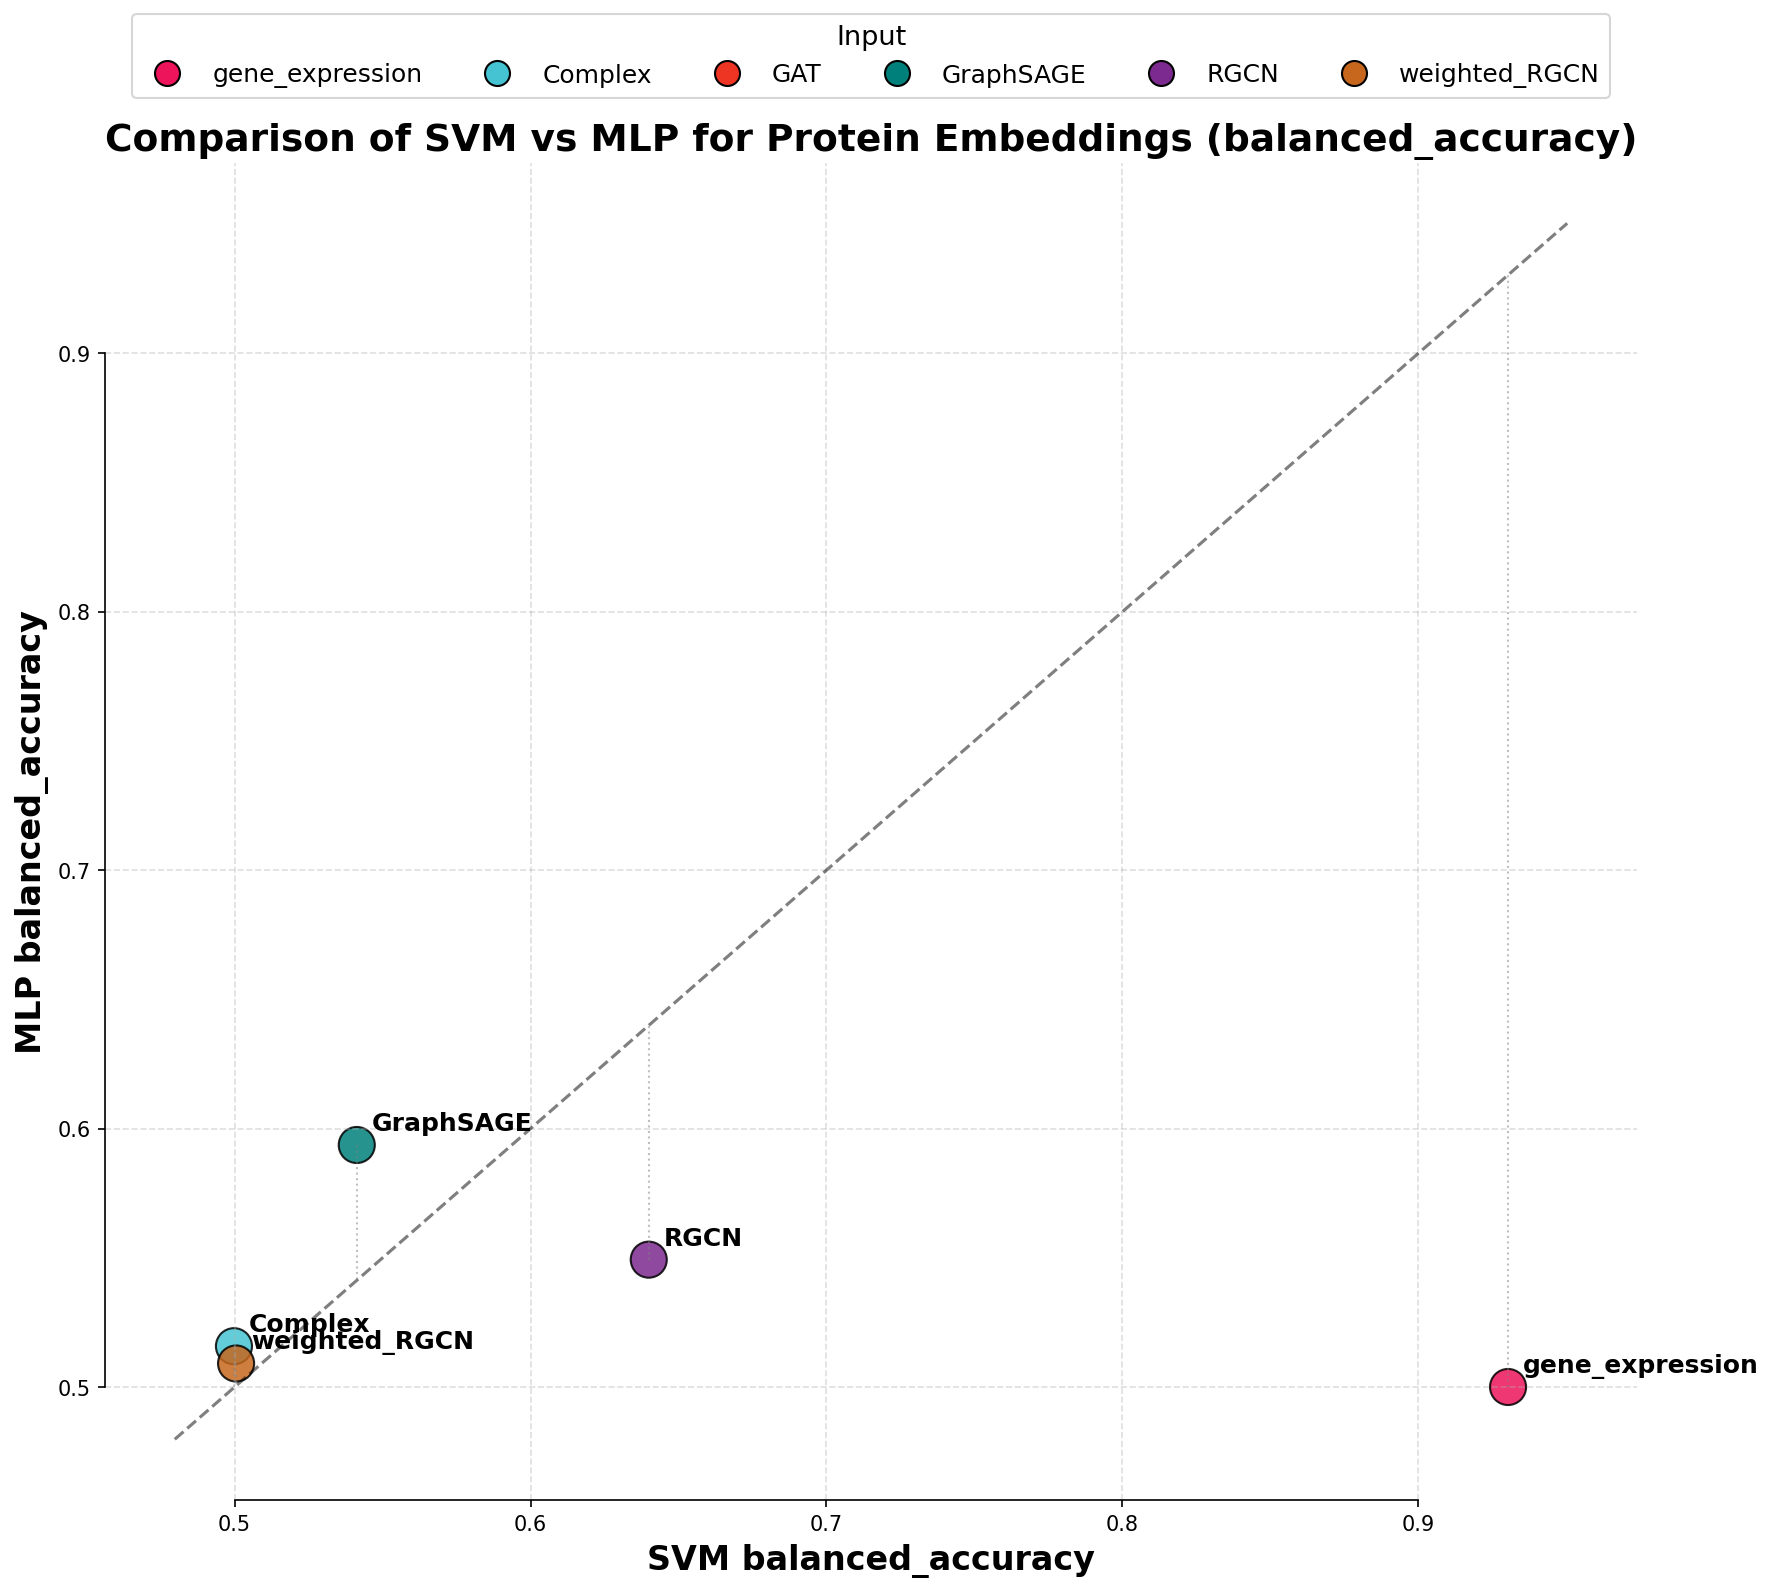

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metric = 'balanced_accuracy'  # or any other metric you want

# Subset models
svm = filtered_results[filtered_results['model'] == 'svm'][['input', metric]]
mlp = filtered_results[filtered_results['model'] == 'sklearn_mlp'][['input', metric]]

# Merge on input
merged = svm.merge(mlp, on='input', suffixes=('_svm', '_mlp'))

# Assign colors from dataset_colors
colors = [dataset_colors.get(inp, "#808080") for inp in merged['input']]  # default gray if missing

plt.figure(figsize=(12, 10), dpi=150)

# Diagonal y=x line
lims = [
    np.min([merged[metric + '_svm'].min(), merged[metric + '_mlp'].min()]) - 0.02,
    np.max([merged[metric + '_svm'].max(), merged[metric + '_mlp'].max()]) + 0.02
]
plt.plot(lims, lims, 'k--', alpha=0.5, linewidth=1.5, label='y = x')

# Scatter plot with larger markers
plt.scatter(
    merged[metric + '_svm'],
    merged[metric + '_mlp'],
    s=300,
    c=colors,
    edgecolor='k',
    alpha=0.85,
    marker='o',
    linewidth=1
)

# Faint lines from points to diagonal
for _, row in merged.iterrows():
    y_diag = row[metric + '_svm']
    x_diag = row[metric + '_svm']
    plt.plot([row[metric + '_svm'], x_diag],
             [row[metric + '_mlp'], y_diag],
             color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Annotate points
for _, row in merged.iterrows():
    plt.annotate(
        row['input'],
        (row[metric + '_svm'], row[metric + '_mlp']),
        textcoords="offset points",
        xytext=(7, 7),
        ha='left',
        fontsize=12,
        weight='bold'
    )

# Labels and title
plt.xlabel(f'SVM {metric}', fontsize=16, weight='bold')
plt.ylabel(f'MLP {metric}', fontsize=16, weight='bold')
plt.title(f'Comparison of SVM vs MLP for Protein Embeddings ({metric})', fontsize=18, weight='bold')

# Grid and style
plt.grid(True, linestyle='--', alpha=0.4)
sns.despine(trim=True)
plt.tight_layout()

# Legend for categories using dataset_colors
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=color, markersize=12,
                      markeredgecolor='k', label=dataset)
           for dataset, color in dataset_colors.items()]
plt.legend(handles=handles, title='Input', loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=6, fontsize=12, title_fontsize=13)

plt.show()
